In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

import sys

sys.path.append('../../helper_classes')
from limit_utils import get_sensitivity_bands

2025-06-28 10:46:46.054727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751132806.068595  924602 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751132806.072763  924602 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751132806.085601  924602 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751132806.085615  924602 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751132806.085616  924602 computation_placer.cc:177] computation placer alr

In [2]:
def get_signal_rates_from_likelihood(likelihood_file):
    sys.path.append('..')
    likelihood_class = __import__('create_simple_template_likelihood', globals(), locals(), [])
    class_names = [name for name in dir(likelihood_class) if isinstance(getattr(likelihood_class, name), type)]
    globals().update({name: getattr(likelihood_class, name) for name in class_names})
    
    likelihood_container = pkl.load(open(likelihood_file, 'rb'))
    signal_expected_mean = likelihood_container.expected_signal_counts
    
    return signal_expected_mean

In [3]:
def scaling_fn(mu, mu_ref):
    return np.sqrt(mu / mu_ref) * 1e-12

In [4]:
signal_expected_mean = get_signal_rates_from_likelihood('likelihoods/ALP_60t_600ty.pkl')

In [5]:
masses, bands = get_sensitivity_bands(directory='outputs/ALP_60t_600ty',
                                      scaling_fn=scaling_fn,
                                      signal_name='ALP',
                                      signal_expected_mean=signal_expected_mean,
                                      inference_config='inference_configs/default.ini')

Found 1 failed toy for ALP12; removing...
Found 43 failed toy for ALP13; removing...
Found 188 failed toy for ALP14; removing...
Found 473 failed toy for ALP15; removing...


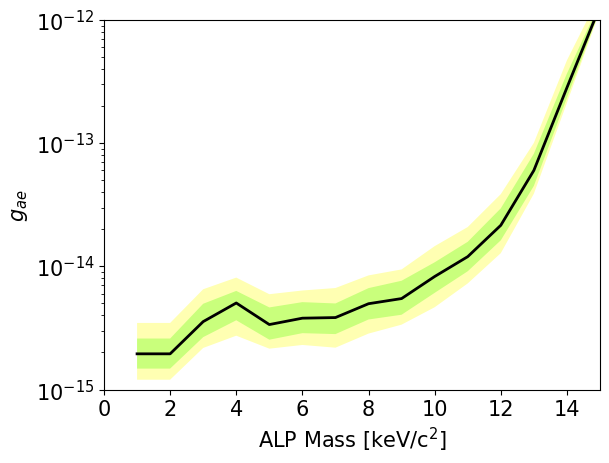

In [6]:
fig = plt.figure()
ax = fig.gca()

plt.plot(masses, bands[0], color='black', lw=2.)
plt.fill_between(masses, bands[-1], bands[1], facecolor='#00ff00', lw=0, alpha=0.3)
plt.fill_between(masses, bands[-2], bands[2], facecolor='#ffff00', lw=0, alpha=0.3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xlab = r'ALP Mass [keV/c$^2$]'
xlim = (0, 15)

ylab = r'$g_{ae}$'
ylim = (1e-15, 1e-12)

ax.set_xlabel(xlab, fontsize=15)
ax.set_xlim(xlim)

ax.set_ylabel(ylab, fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')